In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#enter dataset
dataset = pd.read_csv("DarwinWeather.csv")
print(dataset.head(5))
print(dataset.shape)

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-07-2008   Darwin     20.0     33.1       0.0          4.4      11.0   
1  02-07-2008   Darwin     19.4     32.4       0.0          6.0      10.4   
2  03-07-2008   Darwin     18.2     31.8       0.0          8.0      11.0   
3  04-07-2008   Darwin     17.3     30.7       0.0          7.0      10.4   
4  05-07-2008   Darwin     15.5     30.8       0.0          7.0      10.8   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           E           41.0        ENE  ...        32.0       1016.0   
1         ENE           50.0         SE  ...        17.0       1016.8   
2           E           46.0        ESE  ...        24.0       1017.2   
3           E           44.0         SE  ...        16.0       1017.3   
4         ESE           46.0          E  ...        16.0       1016.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1012.1       1

In [2]:
# drop or delete the unnecessary columns in the data. 
clean_data_1 = dataset.drop(['Date','Location','Evaporation','Sunshine','WindGustDir','WindGustSpeed',
                             'WindDir9am','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RISK_MM',
                             'RainTomorrow','WindDir3pm','WindSpeed9am','WindSpeed3pm'], axis = 1) 
print(clean_data_1)
clean_data_1.to_csv('multi_test_aus.csv')

clean_data_1.dropna(subset = ["MinTemp"], inplace=True)
clean_data_1.dropna(subset = ["MaxTemp"], inplace=True)
clean_data_1.dropna(subset = ["Rainfall"], inplace=True)
clean_data_1.dropna(subset = ["Humidity9am"], inplace=True)
clean_data_1.dropna(subset = ["Humidity3pm"], inplace=True)
clean_data_1.dropna(subset = ["Pressure9am"], inplace=True)
clean_data_1.dropna(subset = ["Pressure3pm"], inplace=True)
print(clean_data_1)

      MinTemp  MaxTemp  Rainfall  Humidity9am  Humidity3pm  Pressure9am  \
0        20.0     33.1       0.0         81.0         32.0       1016.0   
1        19.4     32.4       0.0         81.0         17.0       1016.8   
2        18.2     31.8       0.0         38.0         24.0       1017.2   
3        17.3     30.7       0.0         55.0         16.0       1017.3   
4        15.5     30.8       0.0         37.0         16.0       1016.3   
...       ...      ...       ...          ...          ...          ...   
3006     23.8     31.1      85.0         95.0         71.0       1007.0   
3007     23.8     27.5      24.4         96.0         94.0       1008.0   
3008     23.3     33.5      37.2         86.0         60.0       1007.9   
3009     26.2     33.2       0.0         79.0         71.0       1008.1   
3010     25.6     33.2       0.6         81.0         66.0       1008.5   

      Pressure3pm  
0          1012.1  
1          1012.4  
2          1013.0  
3          1013.6  

In [3]:
#to check data types
data_type = clean_data_1.dtypes
print(data_type)

# statistical parameters
stats = clean_data_1.describe()
print(stats)

MinTemp        float64
MaxTemp        float64
Rainfall       float64
Humidity9am    float64
Humidity3pm    float64
Pressure9am    float64
Pressure3pm    float64
dtype: object
           MinTemp      MaxTemp     Rainfall  Humidity9am  Humidity3pm  \
count  3006.000000  3006.000000  3006.000000  3006.000000  3006.000000   
mean     23.174052    32.575516     4.768929    68.240852    51.520625   
std       2.995185     1.740604    15.802909    14.964646    18.563111   
min      12.500000    24.800000     0.000000    11.000000     5.000000   
25%      21.500000    31.600000     0.000000    62.000000    39.000000   
50%      23.900000    32.800000     0.000000    70.000000    52.000000   
75%      25.300000    33.800000     1.400000    78.000000    63.000000   
max      29.700000    38.000000   367.600000    99.000000    99.000000   

       Pressure9am  Pressure3pm  
count  3006.000000  3006.000000  
mean   1011.972488  1008.402462  
std       3.328501     2.887511  
min     996.300000   9

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

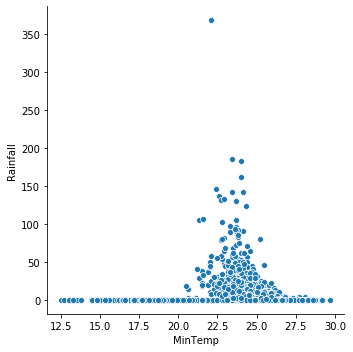

<Figure size 1440x1440 with 0 Axes>

In [4]:
#plot
plt.figure(figsize=(20,20))
sns.relplot(x='MinTemp',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

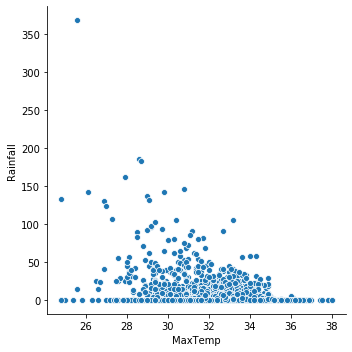

<Figure size 1440x1440 with 0 Axes>

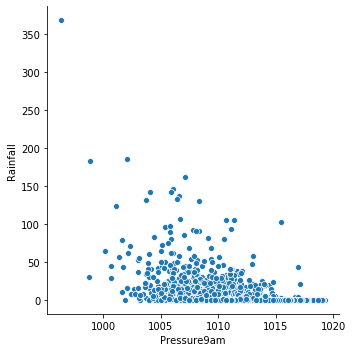

<Figure size 1440x1440 with 0 Axes>

In [5]:
sns.relplot(x='MaxTemp',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))
sns.relplot(x='Pressure9am',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))

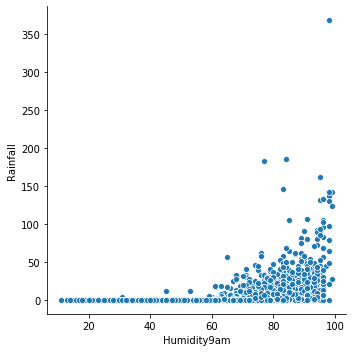

<Figure size 1440x1440 with 0 Axes>

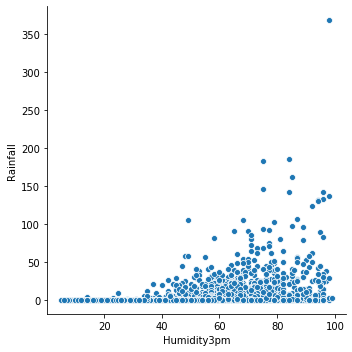

<Figure size 1440x1440 with 0 Axes>

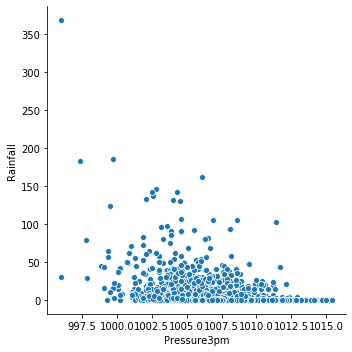

In [6]:

sns.relplot(x='Humidity9am',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))
sns.relplot(x='Humidity3pm',y='Rainfall',data=clean_data_1)
plt.figure(figsize=(20,20))
sns.relplot(x='Pressure3pm',y='Rainfall',data=clean_data_1)

AxesSubplot(0.125,0.125;0.62x0.755)


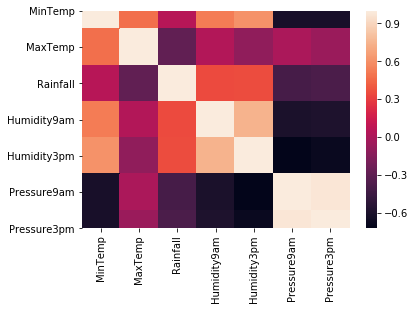

In [7]:
correlation = clean_data_1.corr()
#heat map of the dataset
ax = sns.heatmap(correlation)
print(ax)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     202.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):          4.29e-217
Time:                        22:32:44   Log-Likelihood:                -12051.
No. Observations:                3006   AIC:                         2.412e+04
Df Residuals:                    2999   BIC:                         2.416e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2072.8019    127.004     16.321      0.0

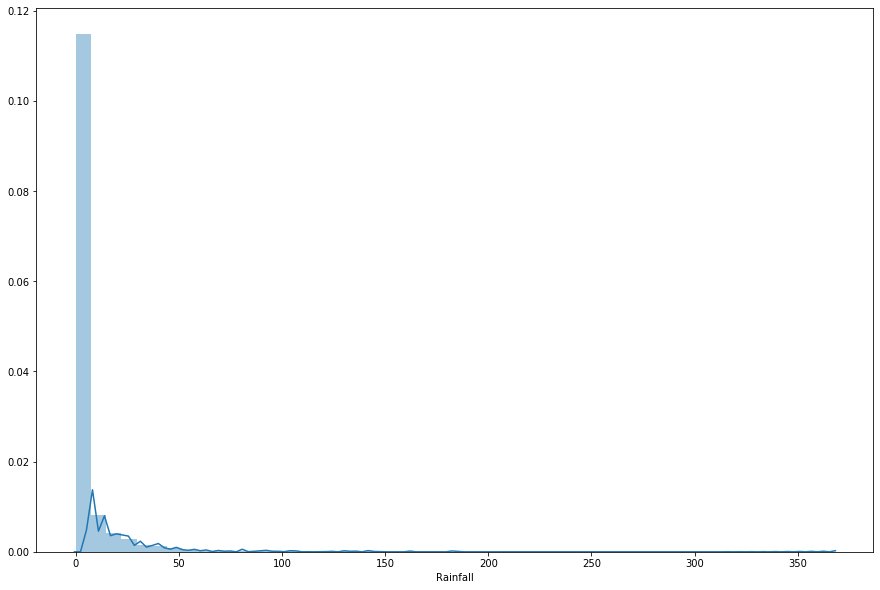

In [13]:
# seperating attributes and labels
X = clean_data_1[['MinTemp','MaxTemp','Pressure9am','Humidity9am',
                  'Humidity3pm','Pressure3pm']].values
Y = clean_data_1['Rainfall'].values

rx = sm.add_constant(X)
results = sm.OLS(Y,rx).fit()
res_sum = results.summary()
print(res_sum)

# checking avg of rainfall column
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(clean_data_1['Rainfall'])

In [9]:
#splitting data set in two parts 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#training the model by regression algo
reg_data = LinearRegression()
reg_data.fit(X_train, Y_train)

# finding coeff of the corresponding input.....B1,B2,B3,B4
coeff_data = pd.DataFrame(reg_data.coef_)
print(coeff_data)

#prediction using test data set
Y_prediction = reg_data.predict(X_test)

          0
0 -1.249592
1 -1.995289
2 -0.529324
3  0.231030
4  0.035879
5 -1.655130


In [10]:
#comparing actual and predicted data
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_prediction.flatten()})
print(df)


     Actual  Predicted
0       2.4  10.672129
1       0.0   8.808610
2       0.0   3.108484
3       0.0  -2.301406
4       0.0  -7.749481
..      ...        ...
597     1.0   8.353353
598    11.8   3.502904
599     1.6  17.954332
600     0.0  -9.411952
601     7.2  19.287737

[602 rows x 2 columns]


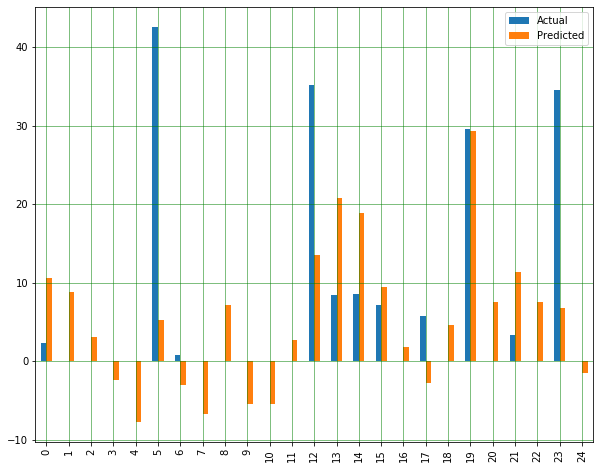

In [11]:

# graphical comparision of predicted and actual
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()